DECISION TREE

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/kyphosis.csv')

In [ ]:
data

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [ ]:
data.isnull().sum()

,0
Kyphosis,0
Age,0
Number,0
Start,0


In [ ]:
data.nunique()

,0
Kyphosis,2
Age,64
Number,8
Start,16


In [ ]:
data['Kyphosis'] = [0 if x == 'absent' else 1 for x in data['Kyphosis']]

In [ ]:
data.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [ ]:
data.describe()

,Kyphosis,Age,Number,Start
count,81.000000,81.000000,81.000000,81.000000
mean,0.209877,83.654321,4.049383,11.493827
std,0.409758,58.104251,1.619423,4.883962
min,0.000000,1.000000,2.000000,1.000000
25%,0.000000,26.000000,3.000000,9.000000
50%,0.000000,87.000000,4.000000,13.000000
75%,0.000000,130.000000,5.000000,16.000000
max,1.000000,206.000000,10.000000,18.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Kyphosis  81 non-null     int64
 1   Age       81 non-null     int64
 2   Number    81 non-null     int64
 3   Start     81 non-null     int64
dtypes: int64(4)
memory usage: 2.7 KB


In [ ]:
x = data.drop(['Kyphosis'], axis = 1)
y=data['Kyphosis']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
dt.score(xtest,ytest)

0.68

In [ ]:
predictions = dt.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        19
           1       0.33      0.33      0.33         6

    accuracy                           0.68        25
   macro avg       0.56      0.56      0.56        25
weighted avg       0.68      0.68      0.68        25



In [ ]:
print(confusion_matrix(ytest,predictions))

[[15  4]
 [ 4  2]]


[Text(0.5833333333333334, 0.9285714285714286, 'x[2] <= 9.0\ngini = 0.316\nsamples = 56\nvalue = [45, 11]'),
 Text(0.3333333333333333, 0.7857142857142857, 'x[0] <= 11.5\ngini = 0.492\nsamples = 16\nvalue = [7, 9]'),
 Text(0.45833333333333337, 0.8571428571428572, 'True  '),
 Text(0.25, 0.6428571428571429, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 130.5\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.25, 0.35714285714285715, 'x[0] <= 88.0\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.16666666666666666, 0.21428571428571427, 'x[1] <= 6.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.08333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.25, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 3\nvalue = [0, 

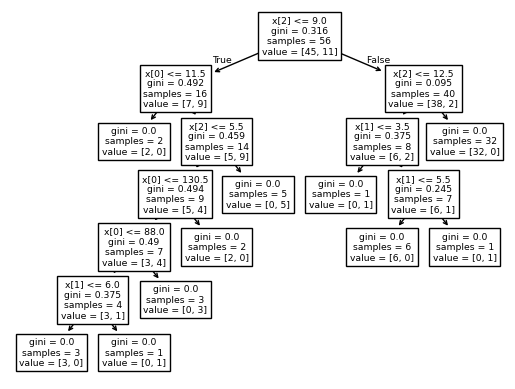

In [ ]:
from sklearn import tree
tree.plot_tree(dt)

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
rf.score(xtest,ytest)

0.72

In [ ]:
predictions2 = rf.predict(xtest)

In [ ]:
print(classification_report(ytest,predictions2))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        19
           1       0.33      0.17      0.22         6

    accuracy                           0.72        25
   macro avg       0.55      0.53      0.53        25
weighted avg       0.67      0.72      0.68        25



In [ ]:
print(confusion_matrix(ytest,predictions2))

[[17  2]
 [ 5  1]]
